In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline
warnings.filterwarnings('ignore')


In [2]:
# Download datasets

!pip install kaggle
#----------------------------
# START get kaggle.json file
!pip install -U -q PyDrive
!pip install -U -q google-auth google-auth-oauthlib google-auth-httplib2

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Set the file ID of the file to be copied
file_link = "https://drive.google.com/file/d/1oobkfPfZBpFE-MZmALTiRxfXjMSjzdpt/view?usp=sharing"
file_id = '1oobkfPfZBpFE-MZmALTiRxfXjMSjzdpt'

# Create a GoogleDriveFile instance with the file ID
file = drive.CreateFile({'id': file_id})

# Download the file to Colab
file.GetContentFile('kaggle.json')

# DONE get kaggle.json file
#----------------------------
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
# Download Dataset
!kaggle competitions download -c dpl-project-2-titanic-disaster

# Move dataset to a folder
!mkdir /content/dataset
!unzip -q dpl-project-2-titanic-disaster.zip -d /content/dataset/dpl-project-2-titanic-disaster

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.8/181.8 kB 3.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires google-auth==2.17.3, but you have google-auth 2.22.0 which is incompatible.
  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 37.7MB/s]


In [41]:
import os
os.chdir('/content/dataset/dpl-project-2-titanic-disaster')

In [42]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# To know number of columns and rows
train.shape
# (891, 12)


(891, 12)

In [43]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

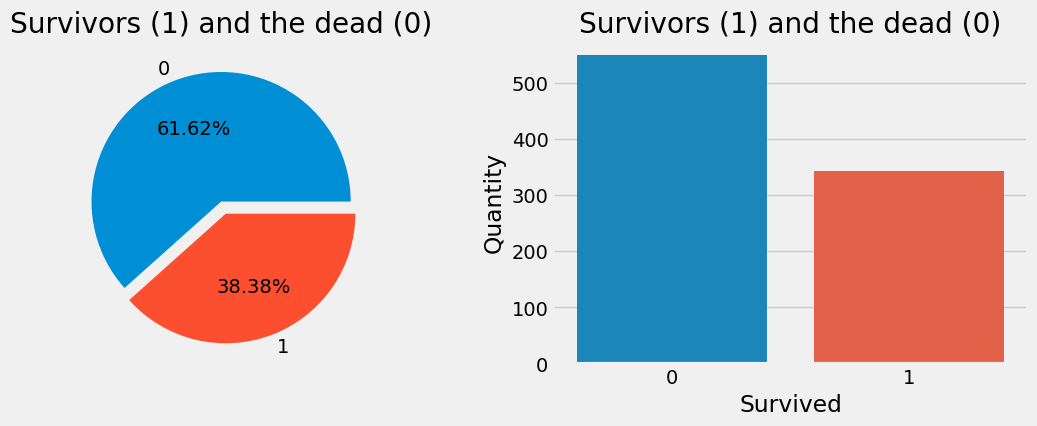

In [45]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))
train['Survived'].value_counts().plot.pie(
	explode=[0, 0.1], autopct='%1.2f%%', ax=ax[0], shadow=False)
ax[0].set_title('Survivors (1) and the dead (0)')
ax[0].set_ylabel('')
sns.countplot(x = 'Survived', data=train, ax=ax[1])
ax[1].set_ylabel('Quantity')
ax[1].set_title('Survivors (1) and the dead (0)')
plt.show()


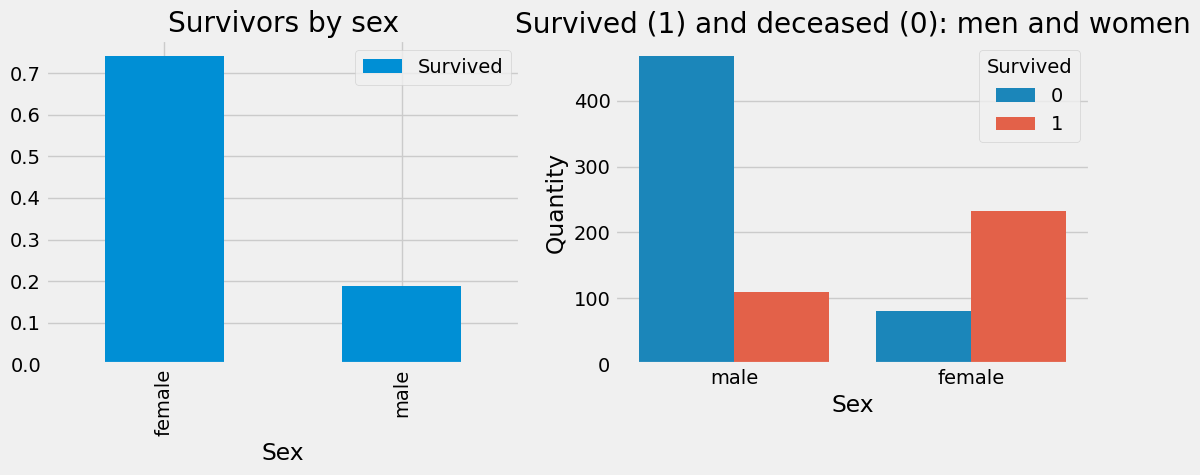

In [46]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))
train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survivors by sex')
sns.countplot(x = 'Sex', hue='Survived', data=train, ax=ax[1])
ax[1].set_ylabel('Quantity')
ax[1].set_title('Survived (1) and deceased (0): men and women')
plt.show()


In [47]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [48]:
# Create a new column cabinbool indicating
# if the cabin value was given or was NaN
train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))

# Delete the column 'Cabin' from test
# and train dataset
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)


In [49]:
train["CabinBool"]

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: CabinBool, Length: 891, dtype: int64

In [50]:
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)


In [51]:
train['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [52]:
# replacing the missing values in
# the Embarked feature with S
train = train.fillna({"Embarked": "S"})


In [53]:
# sort the ages into logical categories
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager',
		'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels=labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels=labels)


In [54]:
# create a combined group of both datasets
combine = [train, test]

# extract a title for each Name in the
# train and test datasets
for dataset in combine:
	dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

# replace various titles with more common names
for dataset in combine:
	dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
												'Don', 'Dr', 'Major',
												'Rev', 'Jonkheer', 'Dona'],
												'Rare')

	dataset['Title'] = dataset['Title'].replace(
		['Countess', 'Lady', 'Sir'], 'Royal')
	dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
	dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
	dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

# map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3,
				"Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
	dataset['Title'] = dataset['Title'].map(title_mapping)
	dataset['Title'] = dataset['Title'].fillna(0)


In [55]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,Young Adult,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,0,Young Adult,6
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1,Student,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.5,1,2,23.4500,S,0,Unknown,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1,Young Adult,1


In [56]:
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() # Young Adult
mr_age

0    Young Adult
Name: AgeGroup, dtype: category
Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' <
                         'Senior']

In [57]:
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() # Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() # Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() # Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() # Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() # Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() # Adult

age_title_mapping = {1: "Young Adult", 2: "Student",
					3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

for x in range(len(train["AgeGroup"])):
	if train["AgeGroup"][x] == "Unknown":
		train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]

for x in range(len(test["AgeGroup"])):
	if test["AgeGroup"][x] == "Unknown":
		test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]


In [58]:
# map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3,
			'Student': 4, 'Young Adult': 5, 'Adult': 6,
			'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train.head()

# dropping the Age feature for now, might change
train = train.drop(['Age'], axis=1)
test = test.drop(['Age'], axis=1)


In [59]:

train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,CabinBool,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,S,0,4.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,C,1,6.0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,S,0,5.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,S,1,5.0,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,8.0500,S,0,5.0,1


In [60]:
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)


In [61]:
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)


In [62]:
test

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,CabinBool,AgeGroup,Title
0,892,3,0,0,0,7.8292,3,0,5.0,1
1,893,3,1,1,0,7.0000,1,0,6.0,3
2,894,2,0,0,0,9.6875,3,0,7.0,1
3,895,3,0,0,0,8.6625,1,0,5.0,1
4,896,3,1,1,1,12.2875,1,0,4.0,3
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,0,0,8.0500,1,0,5.0,1
414,1306,1,1,0,0,108.9000,2,1,6.0,6
415,1307,3,0,0,0,7.2500,1,0,6.0,1
416,1308,3,0,0,0,8.0500,1,0,5.0,1


In [63]:
for x in range(len(test["Fare"])):
	if pd.isnull(test["Fare"][x]):
		pclass = test["Pclass"][x] # Pclass = 3
		test["Fare"][x] = round(
			train[train["Pclass"] == pclass]["Fare"].mean(), 4)

# map Fare values into groups of
# numerical values
train['FareBand'] = pd.qcut(train['Fare'], 4,
							labels=[1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4,
						labels=[1, 2, 3, 4])

# drop Fare values
train = train.drop(['Fare'], axis=1)
test = test.drop(['Fare'], axis=1)


In [64]:
test

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,CabinBool,AgeGroup,Title,FareBand
0,892,3,0,0,0,3,0,5.0,1,1
1,893,3,1,1,0,1,0,6.0,3,1
2,894,2,0,0,0,3,0,7.0,1,2
3,895,3,0,0,0,1,0,5.0,1,2
4,896,3,1,1,1,1,0,4.0,3,2
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,0,0,1,0,5.0,1,2
414,1306,1,1,0,0,2,1,6.0,6,4
415,1307,3,0,0,0,1,0,6.0,1,1
416,1308,3,0,0,0,1,0,5.0,1,2


In [65]:
from sklearn.model_selection import train_test_split

# Drop the Survived and PassengerId
# column from the trainset
predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(
	predictors, target, test_size=0.2, random_state=0)


In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

randomforest = RandomForestClassifier()

# Fit the training data along with its output
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)

# Find the accuracy score of the model
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)


84.36


In [67]:
from sklearn.linear_model import LogisticRegression

logitmodel = LogisticRegression()

# Fit the training data along with its output
logitmodel.fit(x_train, y_train)
y_pred = logitmodel.predict(x_val)

# Find the accuracy score of the model
acc_logitmodel = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logitmodel)

79.33


In [68]:
x_train.shape

(712, 9)

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

XGBmodel = GradientBoostingClassifier()

# Fit the training data along with its output
XGBmodel.fit(x_train, y_train)
y_pred = XGBmodel.predict(x_val)

# Find the accuracy score of the model
acc_XGBmodel = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_XGBmodel)

82.12


In [85]:
from tensorflow import keras
from tensorflow.keras import layers

# Create a sequential model
model = keras.Sequential()

# Add input layer
model.add(layers.Input(shape=(9,)))

# Add hidden layers
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

# Add hidden layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

# Add hidden layers
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(2000, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

# Add output layer
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 256)               2560      
                                                                 
 dense_43 (Dense)            (None, 128)               32896     
                                                                 
 dense_44 (Dense)            (None, 64)                8256      
                                                                 
 dense_45 (Dense)            (None, 512)               33280     
                                                                 
 dense_46 (Dense)            (None, 256)               131328    
                                                                 
 dense_47 (Dense)            (None, 128)               32896     
                                                                 
 dense_48 (Dense)            (None, 64)               

In [86]:
# Training the model
model.fit(x_train, y_train, batch_size=1000, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.6935 - accuracy: 0.3862 - val_loss: 0.6853 - val_accuracy: 0.6145
Epoch 2/100
1/1 [==============================] - 0s 343ms/step - loss: 0.6844 - accuracy: 0.6166 - val_loss: 0.6637 - val_accuracy: 0.6145
Epoch 3/100
1/1 [==============================] - 0s 307ms/step - loss: 0.6595 - accuracy: 0.6166 - val_loss: 0.6575 - val_accuracy: 0.6145
Epoch 4/100
1/1 [==============================] - 0s 303ms/step - loss: 0.6523 - accuracy: 0.6166 - val_loss: 0.6313 - val_accuracy: 0.6145
Epoch 5/100
1/1 [==============================] - 0s 330ms/step - loss: 0.6307 - accuracy: 0.6166 - val_loss: 0.6060 - val_accuracy: 0.6145
Epoch 6/100
1/1 [==============================] - 0s 406ms/step - loss: 0.6087 - accuracy: 0.6166 - val_loss: 0.5661 - val_accuracy: 0.6145
Epoch 7/100
1/1 [==============================] - 0s 493ms/step - loss: 0.5722 - accuracy: 0.6166 - val_loss: 0.5417 - val_accuracy: 0.6145
Epoch 8/100
1/1 

In [72]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(9,)))
model.add(layers.Dense(2, activation="tanh"))

model.add(layers.Dense(1, activation="sigmoid"))  # Đổi activation thành 'sigmoid'

model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Đổi hàm mất mát
              metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 2)                 20        
                                                                 
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________


In [73]:
# Training the model
model.fit(x_train, y_train, batch_size=600, epochs=300, validation_data=(x_val, y_val))

Epoch 1/300
2/2 [==============================] - 1s 255ms/step - loss: 0.6712 - accuracy: 0.6166 - val_loss: 0.6722 - val_accuracy: 0.6145
Epoch 2/300
2/2 [==============================] - 0s 65ms/step - loss: 0.6709 - accuracy: 0.6166 - val_loss: 0.6719 - val_accuracy: 0.6145
Epoch 3/300
2/2 [==============================] - 0s 36ms/step - loss: 0.6707 - accuracy: 0.6166 - val_loss: 0.6716 - val_accuracy: 0.6145
Epoch 4/300
2/2 [==============================] - 0s 39ms/step - loss: 0.6704 - accuracy: 0.6166 - val_loss: 0.6714 - val_accuracy: 0.6145
Epoch 5/300
2/2 [==============================] - 0s 35ms/step - loss: 0.6701 - accuracy: 0.6166 - val_loss: 0.6711 - val_accuracy: 0.6145
Epoch 6/300
2/2 [==============================] - 0s 35ms/step - loss: 0.6699 - accuracy: 0.6166 - val_loss: 0.6709 - val_accuracy: 0.6145
Epoch 7/300
2/2 [==============================] - 0s 56ms/step - loss: 0.6697 - accuracy: 0.6166 - val_loss: 0.6707 - val_accuracy: 0.6145
Epoch 8/300
2/2 [==

__________________

In [ ]:
ids = test['PassengerId']
predictions = randomforest.predict(test.drop('PassengerId', axis=1))

# set the output as a dataframe and convert
# to csv file named resultfile.csv
output = pd.DataFrame({'PassengerId': ids, 'Survived': predictions})
output.to_csv('/content/resultfile.csv', index=False)


In [ ]:
!kaggle competitions submit -c dpl-project-2-titanic-disaster -f /content/resultfile.csv -m "Hi there! 29/07. "

100% 2.77k/2.77k [00:01<00:00, 1.77kB/s]
Successfully submitted to DPL / Project 2 / Titanic Disaster

In [ ]:
pd.read_csv('/content/dataset/dpl-project-2-titanic-disaster/train.csv')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
train

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,CabinBool,AgeGroup,Title,FareBand
0,1,0,3,0,1,0,1,0,4.0,1,1
1,2,1,1,1,1,0,2,1,6.0,3,4
2,3,1,3,1,0,0,1,0,5.0,2,2
3,4,1,1,1,1,0,1,1,5.0,3,4
4,5,0,3,0,0,0,1,0,5.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,0,1,0,5.0,6,2
887,888,1,1,1,0,0,1,1,4.0,2,3
888,889,0,3,1,1,2,1,0,4.0,2,3
889,890,1,1,0,0,0,2,1,5.0,1,3
